### TP Perceptron 

### Question 1

In [35]:
"""Created on Mon Sep 23 17:51:10 2013.

@authors: baskiotis, salmon, gramfort
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from tp_perceptron_source import (rand_gauss, rand_bi_gauss, rand_checkers,
                                  rand_clown, plot_2d, gradient,
                                  plot_gradient, poly2, frontiere_new,
                                  hinge_loss, gr_hinge_loss,
                                  mse_loss, gr_mse_loss, predict, predict_class,zero_one_loss)

import seaborn as sns
from matplotlib import rc
from sklearn import linear_model

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()


# seed initialization
np.random.seed(seed=44)

# for saving files
saving_activated = True  # False



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
###############################################################################
#            Data Generation: example
###############################################################################

n = 100
mu = [1., 1.]
sigmas = [1., 1.]
rand_gauss(n, mu, sigmas)


n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)


n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X2, y2 = rand_clown(n1, n2, sigmas1, sigmas2)


n1 = 75
n2 = 75
sigma = 0.1
X3, y3 = rand_checkers(n1, n2, sigma)

Index_X1_M1 = np.where(y1[y1==-1])
Index_X1_1 = np.where(y1[y1==1])

print(Index_X1_M1)

Index_X2_M1 = np.where(y2[y2==-1])
Index_X2_1 = np.where(y2[y2==1])

print(Index_X2_M1)

Index_X3_M1 = np.where(y3[y3==-1])
Index_X3_1 = np.where(y3[y3==1])

print(Index_X3_M1)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71]),)


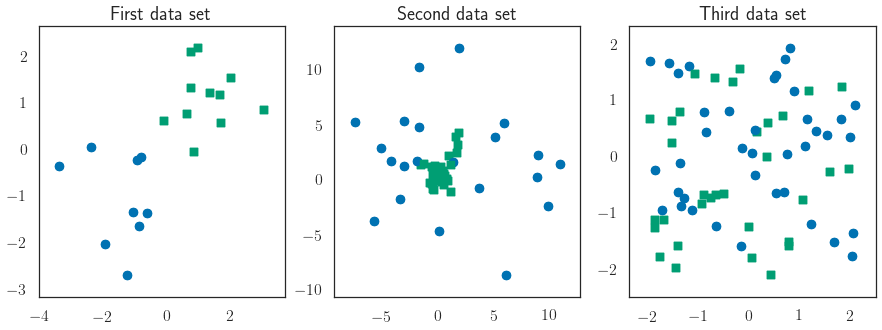

In [37]:
###############################################################################
#            Displaying labeled data
###############################################################################
plt.close("all")



plt.figure(1, figsize=(15, 5))
plt.subplot(131)
plt.title('First data set')
plot_2d(X1[Index_X1_M1], y1[Index_X1_M1])
plot_2d(X1[Index_X1_1], y1[Index_X1_1])


plt.subplot(132)
plt.title('Second data set')
plot_2d(X2[Index_X2_M1], y2[Index_X2_M1])
plot_2d(X2[Index_X2_1], y2[Index_X2_1])

plt.subplot(133)
plt.title('Third data set')
plot_2d(X3[Index_X3_M1], y3[Index_X3_M1])
plot_2d(X3[Index_X3_1], y3[Index_X3_1])
plt.show()






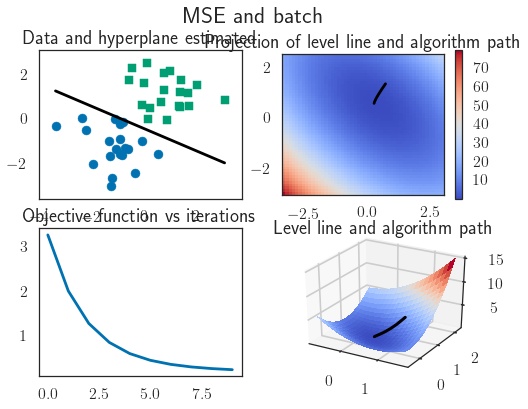

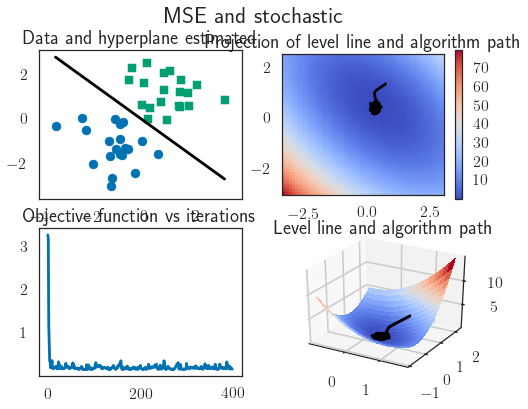

NameError: name 'gr_zero_one_loss' is not defined

In [38]:
###############################################################################
#                Perceptron example
###############################################################################

# XXX: guess good linear classifiers on previous examples.
   
    #1st Data Set : Perceptron
    #2nd Data Set : Dimension augmentation use the norms, 
                    #some linear hyperplan cutting the cluster 
                    #with a majority of green points on one side 
    #3d Data Set : No Clue
    
    
    #On cherche un plan orthogonal à x, on projete x sur un plan orthogonal
    
# XXX: check predict and predict_class functions

W=np.array([2,-1,1]).reshape(-1,1)
F = predict(X1,W)
predict_class(X1,W)


# XXX: properties of each loss function...?
    #1 ZeroOneLoss : constante par morceau
    #2 MSE Loss : quadratique
    #3 Hinge Loss : linéaire par morceau

# MSE Loss:
epsilon = 0.001
niter = 10
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss



# Gradient descent manually coded:
plt.figure(7)
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
plt.suptitle('MSE and batch')
plt.show()

# Gradient descent manually coded:
epsilon = 0.05
plt.figure(8)
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter * len(y1), w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()


# Zero one Loss
epsilon = 0.001
niter = 10
w_ini_l = np.random.randn(X1.shape[1] + 1)
lfun = zero_one_loss
gr_lfun = gr_zero_one_loss


# Gradient descent manually coded:
plt.figure(7)
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
plt.suptitle('Zero One Loss and batch')
plt.show()

# Gradient descent manually coded:
epsilon = 0.05
plt.figure(8)
plt.suptitle('Zero One Loss and stochastic')
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter * len(y1), w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()




# Sklearn SGD:


def f(xx):
    """Classifier"""
    return clf.predict(xx.reshape(1, -1))
clf = linear_model.SGDClassifier()
clf.fit(X1, y1)
plt.figure(88)
wsgd = [clf.intercept_[0], clf.coef_[0, 0], clf.coef_[0, 1]]
frontiere_new(f, X1, y1, wsgd, step=200, alpha_choice=1)
plt.show()


# Hinge Loss:
epsilon = 0.01
niter = 200
std_ini = 1.
w_ini = std_ini * np.random.randn(X1.shape[1] + 1)

lfun = hinge_loss
gr_lfun = gr_hinge_loss
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                     gr_lfun, stochastic=False)

plt.figure(9)
plt.suptitle('Hinge and batch')
plot_gradient(X1, y1, wh, costh, lfun)
plt.show()

plt.figure(10)
plt.suptitle('Hinge and stochastic')
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()


# Create a figure with all the boundary displayed with a
# brighter display for the newest one using alpha_choice in plot_2d
epsilon = 0.1
niter = 50
plt.figure(11)
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
indexess = np.arange(0., 1., 1. / float(niter))
for i in range(niter):
    plot_2d(X1, y1, wh_sto[i, :], alpha_choice=indexess[i])




In [ ]:
#Gradiant Stochastic manually coded
#Initialise w
#For i=1 to n do
#xi= np.choice(x) #avec remise 
#x=x-xi (sans remise)



In [32]:
###############################################################################
#               Perceptron for larger dimensions
###############################################################################
epsilon = 0.01
niter = 50

proj = poly2
XX2 = proj(X2)
w_ini = np.random.randn(niter, XX2.shape[1] + 1)

clf = linear_model.SGDClassifier()
# XXX do fitting.
clf.fit(X2,y2)

plt.figure(11)
plt.clf()
# frontiere_new(lambda xx: XXX, X2, y2)
plt.show()

# QUESTION: compare with or without 2nd order features.


/home/joseph/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
